<a href="https://colab.research.google.com/github/NinCheon/Data_Analytics/blob/main/%EC%B5%9C%EC%A2%85_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __4주차 ML보고서__
## Data Processing
### __1. 데이터 수집__

- 수집된 데이터에 대한 데이터의 출처
> 수집된 데이터는 ‘한살림 데이터’로 한살림의 2021년도 판매 데이터, 고객 데이터, 그리고 제품 데이터로 구성되어있다.
>
>해당 데이터는 한살림에서 수요예측분석 모델 개발 및 시스템 연동을 위해 입찰 공고를 진행했을 때 발표된 데이터로, 한살림 측에서 발표한
공식 데이터이다.
>
>이 데이터는 데이터 분석 동아리에 참여하며 얻게된 데이터이다.

- 다음은 위 데이터에 대한 장표이다.
- 고객 데이터 : 고객의 ID, 나이, 성별 등의 정보를 포함한 데이터
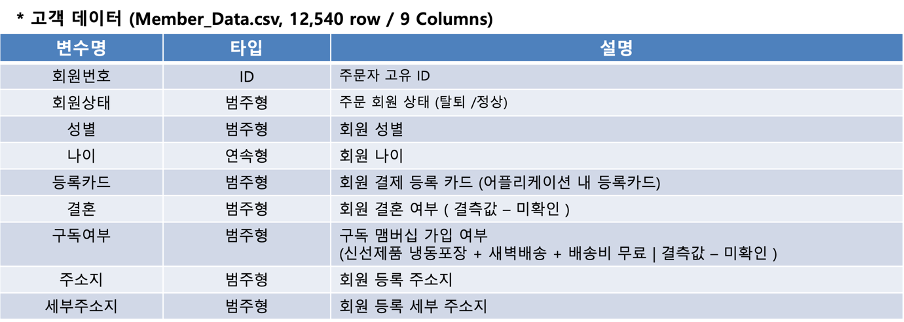
- 판매 데이터 : 고객이 구매한 제품, 구매 날짜, 구매 금액 등 다양한 판매 관련 기록을 포함하고 있으며, 각 고객의 구매 패턴을 파악하는 데 사용되는 데이터
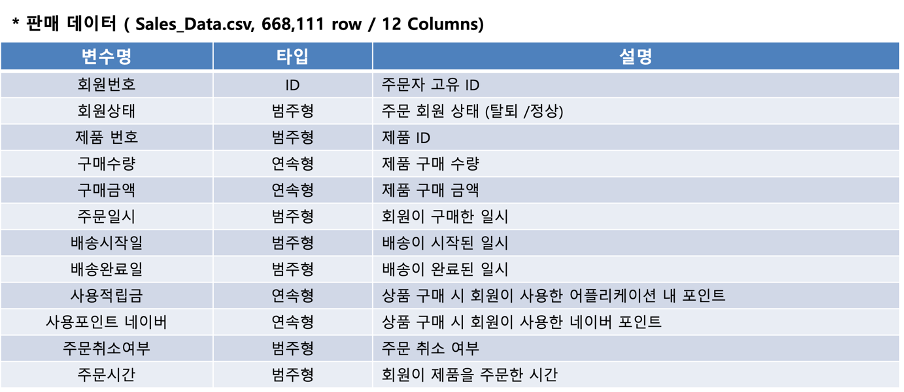


# __전처리 시작__

In [ ]:
# 전처리 과정
# 필요한 패키지 세팅
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from scipy import stats
from scipy.stats import norm
from scipy.stats import pointbiserialr
from statsmodels.formula.api import ols
from google.colab import drive
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 로드

sales_data = pd.read_csv('/content/01 Sales_Data.csv')
member_data = pd.read_csv("/content/02 Member_Data.csv")

In [ ]:
# 데이터 병합
merged_data = pd.merge(sales_data, member_data, on='회원번호')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668111 entries, 0 to 668110
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        668111 non-null  int64  
 1   회원상태_x      668109 non-null  object 
 2   구매수량        668111 non-null  float64
 3   구매금액        668111 non-null  int64  
 4   주문일시        668111 non-null  object 
 5   배송시작일       637476 non-null  object 
 6   배송완료일       637476 non-null  object 
 7   사용 적립금      668111 non-null  int64  
 8   사용 포인트 네이버  668111 non-null  int64  
 9   주문취소여부      30635 non-null   object 
 10  주문시간        668111 non-null  object 
 11  제품번호        668111 non-null  object 
 12  Unnamed: 0  668111 non-null  int64  
 13  회원상태_y      668109 non-null  object 
 14  성별          668109 non-null  object 
 15  나이          668111 non-null  int64  
 16  등록카드        667963 non-null  object 
 17  결혼          518980 non-null  object 
 18  구독여부        548144 non-null  object 
 19  주소

- 회원 번호를 기준으로 두 데이터를 병합하였다.

In [ ]:
#데이터 확인
merged_data.describe()

,회원번호,구매수량,구매금액,사용 적립금,사용 포인트 네이버,Unnamed: 0,나이
count,6.681110e+05,668111.000000,6.681110e+05,668111.000000,668111.000000,668111.000000,668111.000000
mean,7.405263e+08,1.192044,1.182197e+04,256.007189,74.555822,5627.928683,42.899328
std,4.312590e+08,0.694327,1.704992e+04,1501.949061,2723.137522,3551.921970,11.383541
min,1.876416e+07,0.050000,1.840000e+02,0.000000,0.000000,0.000000,18.000000
25%,3.846968e+08,1.000000,4.212000e+03,0.000000,0.000000,2529.000000,34.000000
50%,7.453770e+08,1.000000,7.658000e+03,0.000000,0.000000,5400.000000,41.000000
75%,1.052064e+09,1.000000,1.378400e+04,0.000000,0.000000,8591.000000,50.000000
max,1.670621e+09,75.000000,2.890766e+06,98260.000000,251600.000000,12539.000000,100.000000


In [ ]:
# 필요한 변수 선택 및 전처리
data = merged_data[['회원번호','회원상태_x','구매수량','구매금액','배송시작일','배송완료일',
                    '주문일시', '주문취소여부', '성별', '나이', '결혼', '등록카드', '구독여부']]

In [ ]:
# 컬럼명 변경
data = data.rename(columns={'회원번호':'Use_ID','회원상태_x':'Use_Stat','구매수량':'Buy_Volume',
                            '구매금액':'Buy_Price', '배송시작일':'Deliv_start', '배송완료일':'Deliv_end',
                            '주문일시':'Order_Date', '주문취소여부':'Order_Cancel', '성별':'Sex',
                            '나이':'Age', '결혼':'Marriage', '등록카드':'Reg_Card', '구독여부':'Sub_YN'})


### 데이터 유형 확인

In [ ]:
## 연속형 데이터 확인
data.describe(include=[np.number])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668111 entries, 0 to 668110
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Use_ID        668111 non-null  int64  
 1   Use_Stat      668109 non-null  object 
 2   Buy_Volume    668111 non-null  float64
 3   Buy_Price     668111 non-null  int64  
 4   Deliv_start   637476 non-null  object 
 5   Deliv_end     637476 non-null  object 
 6   Order_Date    668111 non-null  object 
 7   Order_Cancel  30635 non-null   object 
 8   Sex           668109 non-null  object 
 9   Age           668111 non-null  int64  
 10  Marriage      518980 non-null  object 
 11  Reg_Card      667963 non-null  object 
 12  Sub_YN        548144 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 66.3+ MB


In [ ]:
## 구매수량
data['Buy_Volume'].describe()
### 거의 1개씩 구매한다고 나오고 있는데, 이상치 쪽 확인이 필요하다.

,Buy_Volume
count,668111.000000
mean,1.192044
std,0.694327
min,0.050000
25%,1.000000
50%,1.000000
75%,1.000000
max,75.000000


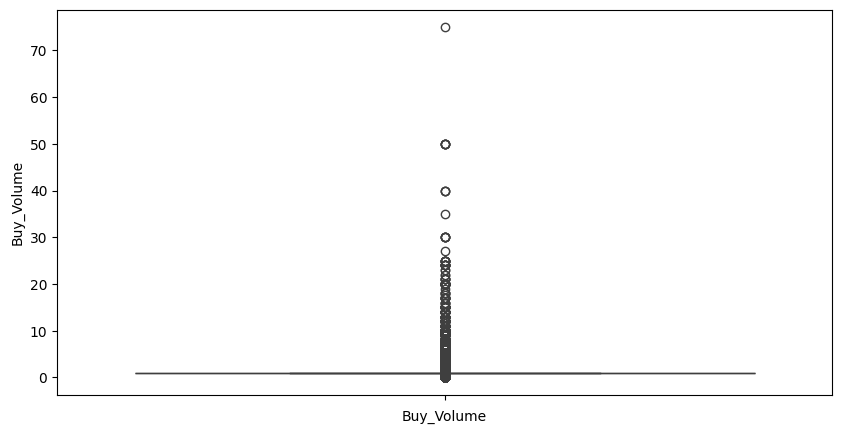

In [ ]:
# 구매수량 boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Buy_Volume'])
plt.xlabel('Buy_Volume')
plt.show()

In [ ]:
## 구매수량 이상치 비율
Q1_b = data['Buy_Volume'].quantile(0.25)
Q3_b = data['Buy_Volume'].quantile(0.75)
IQR_b = Q3_b - Q1_b
outlier_volume = data['Buy_Volume'] > (Q3_b + 1.5 * IQR_b)
outlier_ratio_volume = outlier_volume.sum()/len(data['Buy_Volume'])
outlier_ratio_volume *100

13.706704424863533

In [ ]:
## 구매금액
data['Buy_Price'].describe()
### 평균이 1만원 정도인데, max가 굉장히 크다. 해당 변수의 분포를 확인하자

,Buy_Price
count,6.681110e+05
mean,1.182197e+04
std,1.704992e+04
min,1.840000e+02
25%,4.212000e+03
50%,7.658000e+03
75%,1.378400e+04
max,2.890766e+06


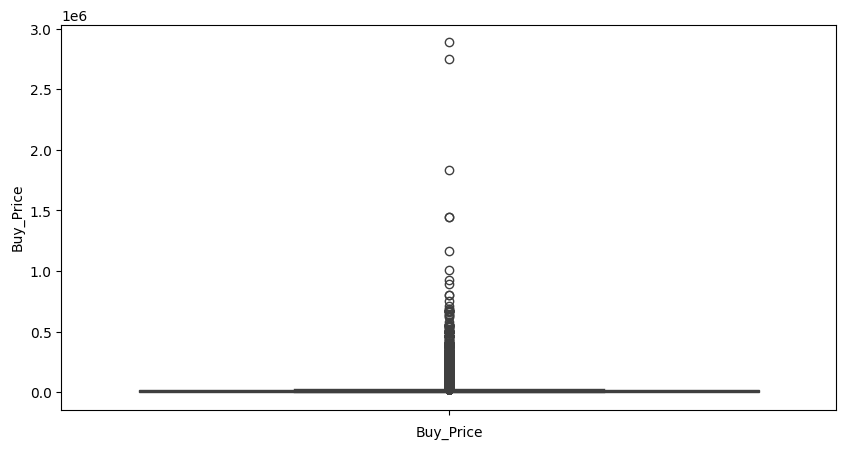

In [ ]:
## 구매금액 boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Buy_Price'])
plt.xlabel('Buy_Price')
plt.show()

> 평균은 약 11,822원이고, 최솟값 184에 비해 최댓값은 2,890,766원이다.

### 이상치 처리

In [ ]:
## 구매금액 이상치 비율
Q1 = data['Buy_Price'].quantile(0.25)
Q3 = data['Buy_Price'].quantile(0.75)
IQR = Q3 - Q1
outlier_price = data['Buy_Price'] > (Q3 + 1.5 * IQR)
outlier_ratio_price = outlier_price.sum()/len(data['Buy_Price'])
outlier_ratio_price *100

7.415983272240691

In [ ]:
## 나이
data['Age'].describe()
### 평균 40세, 최소 18세, 최대 100세이다.
### 100세는 이상치를 의심할 수 있다.

,Age
count,668111.000000
mean,42.899328
std,11.383541
min,18.000000
25%,34.000000
50%,41.000000
75%,50.000000
max,100.000000


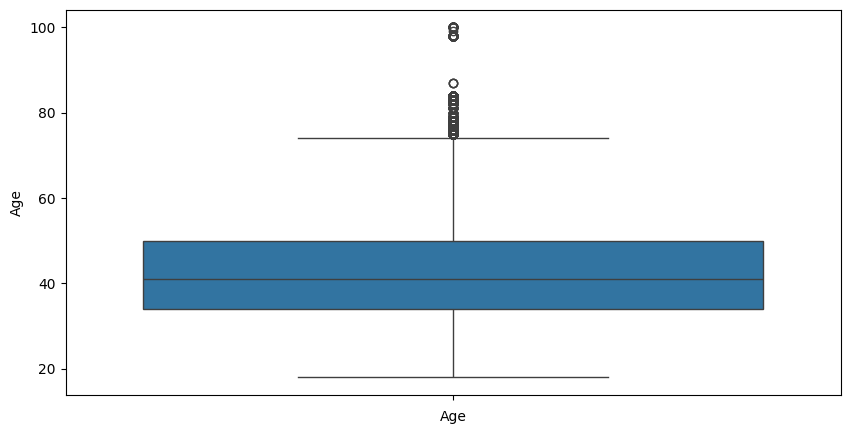

In [ ]:
# 나이 boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Age'])
plt.xlabel('Age')
plt.show()

In [ ]:
## 나이 이상치 비율
Q1_a = data['Age'].quantile(0.25)
Q3_a = data['Age'].quantile(0.75)
IQR_a = Q3_a - Q1_a
outlier_age = data['Age'] > (Q3_a + 1.5 * IQR_a)
outlier_ratio_age = outlier_age.sum()/len(data['Age'])
outlier_ratio_age *100

0.4801597339364267

In [ ]:
### 나이 이상치인 outlier_age 제거
data = data[~outlier_age]

## 범주형 및 기타 데이터 확인

In [ ]:
## 회원상태
data['Use_Stat'].value_counts()
### 탈퇴, 탈퇴처리중, 탈퇴신청과 같은 것들을 처리해줘야한다.

,count
Use_Stat,
정상회원,657538
탈퇴,7218
탈퇴처리중,131
탈퇴신청,14


In [ ]:
## 주문일시
data['Order_Date'].sample(5)
data['Order_Date'].isnull().sum()
data['Order_Date'].max()
data['Order_Date'].min()

'2021.1.10'

In [ ]:
# 가장 빈도수가 높은 주문일자 출력
data['Order_Date'].value_counts().idxmax()
### 2021.1.10 ~ 2021.09.09 간의 데이터

'2021.2.14'

In [ ]:
## 배송시작일
data['Deliv_start'].isnull().sum()
data['Deliv_start'].sample(5)

,Deliv_start
403028,2021.4.30
158426,2021.1.23
424535,2021.9.11
557599,2021.8.7
637947,2021.8.29


In [ ]:
## 배송완료일
data['Deliv_end'].isnull().sum()
data['Deliv_end'].sample(5)

,Deliv_end
89378,2021.7.24
592724,2021.1.8
116869,2021.11.1
56637,2021.6.2
17261,2021.6.11


In [ ]:
## 주문취소여부
data['Order_Cancel'].value_counts()

,count
Order_Cancel,
주문취소,30492


In [ ]:
## 성별
data['Sex'].value_counts()
### 남성에 비해 여성이 압도적으로 높다는 것을 확인할 수 있다.

,count
Sex,
여,623358
남,41543


In [ ]:
## 결혼
data['Marriage'].value_counts()

,count
Marriage,
기혼,265549
미혼,251460


In [ ]:
## 등록카드
data['Reg_Card'].value_counts()

,count
Reg_Card,
롯데카드,94098
국민은행,91114
연결앱결제,75557
신한은행,74129
농협중앙회,58429
우리은행,54069
신한카드,28916
국민카드,28078
기업은행,24549


In [ ]:
## 구독여부
data['Sub_YN'].value_counts()

,count
Sub_YN,
False,451410
True,94044


In [ ]:
## 전체 결측치 확인
data.isnull().sum()

,0
Use_ID,0
Use_Stat,2
Buy_Volume,0
Buy_Price,0
Deliv_start,30492
Deliv_end,30492
Order_Date,0
Order_Cancel,634411
Sex,2
Age,0


## __결측값 처리__

- 해당 데이터의 결측값을 확인하고 제거한다.

In [ ]:
#결측값 확인
merged_data.isnull().sum()

회원번호               0
회원상태_x             2
구매수량               0
구매금액               0
주문일시               0
배송시작일          30635
배송완료일          30635
사용 적립금             0
사용 포인트 네이버         0
주문취소여부        637476
주문시간               0
제품번호               0
Unnamed: 0         0
회원상태_y             2
성별                 2
나이                 0
등록카드             148
결혼            149131
구독여부          119967
주소지              122
세부주소지            592
dtype: int64

- 존재하는 컬럼 중, 필요한 변수만 선택한다.
> 현재 '회원상태' 컬럼의 경우 x와 y로 나뉘어져 있는데, 이는 병합 과정에서 동일한 컬럼이 복제되어 나뉜 것이다.
>
>따라서, 그 중 '회원번호_x'만 사용할 예정이다.

- 회원번호, 구매수량, 구매금액, 주문일시, 배송시작일,배송완료일, 주문취소여부,성별,나이,결혼,등록카드,구독여부 컬럼만 선택한다.

In [ ]:
data = merged_data[['회원번호','회원상태_x','구매수량','구매금액', '주문일시', '배송시작일','배송완료일', '주문취소여부','성별','나이','결혼','등록카드','구독여부']]
data.isnull().sum()

회원번호           0
회원상태_x         2
구매수량           0
구매금액           0
주문일시           0
배송시작일      30635
배송완료일      30635
주문취소여부    637476
성별             2
나이             0
결혼        149131
등록카드         148
구독여부      119967
dtype: int64

### 컬럼명 변경
- 컬럼명을 영문으로 바꿔준다.

> `회원번호` : Use_ID
>
> `회원상태` : Use_Stat
>
> `구매수량` : Buy_Volume
>
> `구매금액` : Buy_Price
>
> `주문일시` : Order_Date
>
> `배송시작일` : Deliv_Start
>
> `배송완료일` : Deliv_End
>
> `배송기간` : Deliv_Period
>
> `주문취소여부` : Order_Cancel
>
> `성별` : Sex
>
> `나이` : Age
>
> `결혼` : Marriage
>
> `등록카드` : Reg_Card
>
> `구독여부` : Sub_YN
>
> `이탈기간` : Bounce_Date

In [ ]:
# 컬럼명 변경
data = data.rename(columns={'회원번호':'Use_ID','회원상태_x':'Use_Stat','구매수량':'Buy_Volume','구매금액':'Buy_Price','주문일시':'Order_Date','배송시작일':'Deliv_Start','배송완료일':'Deliv_End','주문취소여부':'Order_Cancel','성별':'Sex','나이':'Age','결혼':'Marriage','등록카드':'Reg_Card','구독여부':'Sub_YN'})
data.head()

,Use_ID,Use_Stat,Buy_Volume,Buy_Price,Order_Date,Deliv_Start,Deliv_End,Order_Cancel,Sex,Age,Marriage,Reg_Card,Sub_YN
0,1032097472,정상회원,1.0,7083,2021.1.2,NaN,NaN,주문취소,여,39,기혼,우리은행,NaN
1,1032097472,정상회원,1.0,29865,2021.1.2,2021.1.2,2021.1.2,NaN,여,39,기혼,우리은행,NaN
2,1032097472,정상회원,1.0,23164,2021.1.2,2021.1.2,2021.1.3,NaN,여,39,기혼,우리은행,NaN
3,369152832,정상회원,1.0,16655,2021.1.2,2021.1.2,2021.1.3,NaN,여,40,기혼,농협중앙회,False
4,1032097472,정상회원,1.0,8423,2021.1.2,NaN,NaN,주문취소,여,39,기혼,우리은행,NaN


- 데이터 타입을 각 컬럼에 맞도록 바꿔준다.
-  시계열 데이터지만, object type로 저장된 아래의 데이터가 대상이다.
   - `Order_Date`
   - `Deliv_Start`
   - `Deliv_End`



In [ ]:
# 데이터 타입 확인
data.dtypes

Use_ID            int64
Use_Stat         object
Buy_Volume      float64
Buy_Price         int64
Order_Date       object
Deliv_Start      object
Deliv_End        object
Order_Cancel     object
Sex              object
Age               int64
Marriage         object
Reg_Card         object
Sub_YN           object
dtype: object

In [ ]:
# 데이터 타입 변경
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Deliv_Start'] = pd.to_datetime(data['Deliv_Start'])
data['Deliv_End'] = pd.to_datetime(data['Deliv_End'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668111 entries, 0 to 668110
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Use_ID        668111 non-null  int64         
 1   Use_Stat      668109 non-null  object        
 2   Buy_Volume    668111 non-null  float64       
 3   Buy_Price     668111 non-null  int64         
 4   Order_Date    668111 non-null  datetime64[ns]
 5   Deliv_Start   637476 non-null  datetime64[ns]
 6   Deliv_End     637476 non-null  datetime64[ns]
 7   Order_Cancel  30635 non-null   object        
 8   Sex           668109 non-null  object        
 9   Age           668111 non-null  int64         
 10  Marriage      518980 non-null  object        
 11  Reg_Card      667963 non-null  object        
 12  Sub_YN        548144 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(6)
memory usage: 66.3+ MB


- `Deliv_End`에서 `Deliv_Start`을 빼서 배송 기간 컬럼을 추가한다.
> `배송 기간` : Deliv_Period

In [ ]:
data['Deliv_Period'] = (pd.to_datetime(data['Deliv_End']) - pd.to_datetime(data['Deliv_Start'])).dt.days
data.head()

,Use_ID,Use_Stat,Buy_Volume,Buy_Price,Order_Date,Deliv_Start,Deliv_End,Order_Cancel,Sex,Age,Marriage,Reg_Card,Sub_YN,Deliv_Period
0,1032097472,정상회원,1.0,7083,2021-01-02,NaT,NaT,주문취소,여,39,기혼,우리은행,NaN,NaN
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,NaN,여,39,기혼,우리은행,NaN,0.0
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,NaN,여,39,기혼,우리은행,NaN,1.0
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,NaN,여,40,기혼,농협중앙회,False,1.0
4,1032097472,정상회원,1.0,8423,2021-01-02,NaT,NaT,주문취소,여,39,기혼,우리은행,NaN,NaN


- `NaN`이 아닌, `Deliv_Period` 컬럼의 로우의 수와 `Order_CanCel` 컬럼의 로우의 수를 합한 값이 데이터 총 로우의 수와 같은지 확인한다.

In [ ]:
print(data[data['Deliv_Period'].notnull()]['Deliv_Period'].count() + data[data['Order_Cancel'].notnull()]['Order_Cancel'].count())
print(data['Use_ID'].count())

668111
668111


> 결국 배송 관련 컬럼에서의 NaN은 주문취소를 의미한다는 것을 알 수 있다.
>
> `Deliv_Start`와 `Deliv_End` 컬럼을 탈락시킨다.

In [ ]:
data = data.drop(['Deliv_Start','Deliv_End'], axis=1)

- `Order_Cancel`컬럼의 NaN을 '배송완료'로 변경한다

In [ ]:
data['Order_Cancel'] = data['Order_Cancel'].fillna('배송완료')
data.isnull().sum()

Use_ID               0
Use_Stat             2
Buy_Volume           0
Buy_Price            0
Order_Date           0
Order_Cancel         0
Sex                  2
Age                  0
Marriage        149131
Reg_Card           148
Sub_YN          119967
Deliv_Period     30635
dtype: int64

- 성별 데이터의 결측값을 가진 로우를 탈락시킨다

In [ ]:
data = data.dropna(subset=['Sex'])
data['Sex'].value_counts()
# 성별 데이터의 결측치 재확인
data.isnull().sum()

Use_ID               0
Use_Stat             2
Buy_Volume           0
Buy_Price            0
Order_Date           0
Order_Cancel         0
Sex                  0
Age                  0
Marriage        149129
Reg_Card           148
Sub_YN          119967
Deliv_Period     30635
dtype: int64

- 회원 상태 데이터의 결측값을 포함한, 탈퇴 관련 상태를 `탈퇴`로 변경한다.

In [ ]:
# Use_Stat의 결측값을 확인한다
data['Use_Stat'].value_counts()
# Use_Stat 컬럼에서 '정상회원'을 제외한 결측값을 포함한 모든 로우를 '탈퇴'로 변경한다.
data.loc[data['Use_Stat'] != '정상회원', 'Use_Stat'] = '탈퇴'
data['Use_Stat'].value_counts()

Use_Stat
정상회원    660561
탈퇴        7548
Name: count, dtype: int64

- `Deliv_Period` 컬럼의 결측치를 `주문취소`로 보간하고, `Order_Cancel`컬럼을 탈락시킨다

In [ ]:
data['Deliv_Period'] = data['Deliv_Period'].fillna('주문취소')
data = data.drop(['Order_Cancel'], axis=1)

- 등록된 카드를 확인하고 결측값을 보간한다.

In [ ]:
# 등록된 카드 확인
data['Reg_Card'].value_counts()
# Reg_Card의 결측값을 '기타'로 보간한다
data['Reg_Card'] = data['Reg_Card'].fillna('기타')

- 이탈기간 확인
- `Bounce`라는 컬럼명으로, merged_data[`'Order_Date'`]의 최대값과 data[`'Order_Date'`]의 차이를 저장한다. -> 이탈기간 도출
- `Use_ID`를 기준으로 그룹화한 후, `Order_Date`의 최대값을 `Bounce` 컬럼에 저장한다.
> `Bounce` : 이탈 기간
>
> `Latest_Order_Date` : 가장 최근의 주문일자
>
> `Days_Since_Last_Purchase` : 기준일자와 가장 최근 주문일자 간의 차이
>
> `IS_Churned` : 이탈 여부 판단

In [ ]:
# 데이터 내 가장 최근 날짜를 기준일자로 설정
max_date = data['Order_Date'].max()

# 회원별로 가장 최근 주문일자를 찾고 이를 기존 데이터에 병합하여 추가
data['Latest_Order_Date'] = data.groupby('Use_ID')['Order_Date'].transform('max')

# 기준일자와 가장 최근 주문일자 간의 차이를 계산하여 'Days_Since_Last_Purchase' 컬럼 생성
data['Days_Since_Last_Purchase'] = (max_date - data['Latest_Order_Date']).dt.days

# 이탈 여부를 판단하는 새로운 컬럼 'Is_Churned' 생성 (30일 이상이면 1, 아니면 0)
data['Is_Churned'] = data['Days_Since_Last_Purchase'].apply(lambda x: 1 if x >= 31 else 0)

# 결과 확인
print(data.head())
data['Is_Churned'].value_counts()

       Use_ID Use_Stat  Buy_Volume  Buy_Price Order_Date Sex  Age Marriage  \
0  1032097472     정상회원         1.0       7083 2021-01-02   여   39       기혼   
1  1032097472     정상회원         1.0      29865 2021-01-02   여   39       기혼   
2  1032097472     정상회원         1.0      23164 2021-01-02   여   39       기혼   
3   369152832     정상회원         1.0      16655 2021-01-02   여   40       기혼   
4  1032097472     정상회원         1.0       8423 2021-01-02   여   39       기혼   

  Reg_Card Sub_YN Deliv_Period Latest_Order_Date  Days_Since_Last_Purchase  \
0     우리은행    NaN         주문취소        2021-10-23                         8   
1     우리은행    NaN          0.0        2021-10-23                         8   
2     우리은행    NaN          1.0        2021-10-23                         8   
3    농협중앙회  False          1.0        2021-10-28                         3   
4     우리은행    NaN         주문취소        2021-10-23                         8   

   Is_Churned  
0           0  
1           0  
2           0 

Is_Churned
0    586657
1     81452
Name: count, dtype: int64

In [ ]:
# 데이터 중간 점검
data.describe()

,Use_ID,Buy_Volume,Buy_Price,Order_Date,Age,Latest_Order_Date,Days_Since_Last_Purchase,Is_Churned
count,6.681090e+05,668109.000000,6.681090e+05,668109,668109.000000,668109,668109.000000,668109.000000
mean,7.405239e+08,1.192045,1.182197e+04,2021-05-31 08:56:42.026914816,42.899346,2021-10-14 22:37:58.460550656,16.056962,0.121914
min,1.876416e+07,0.050000,1.840000e+02,2021-01-02 00:00:00,18.000000,2021-01-02 00:00:00,0.000000,0.000000
25%,3.846968e+08,1.000000,4.212000e+03,2021-03-17 00:00:00,34.000000,2021-10-19 00:00:00,1.000000,0.000000
50%,7.453770e+08,1.000000,7.658000e+03,2021-06-02 00:00:00,41.000000,2021-10-27 00:00:00,4.000000,0.000000
75%,1.052064e+09,1.000000,1.378400e+04,2021-08-14 00:00:00,50.000000,2021-10-30 00:00:00,12.000000,0.000000
max,1.670621e+09,75.000000,2.890766e+06,2021-10-31 00:00:00,100.000000,2021-10-31 00:00:00,302.000000,1.000000
std,4.312575e+08,0.694328,1.704994e+04,NaN,11.383554,NaN,36.593896,0.327187


In [ ]:
# 데이터 중간 점검
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668109 entries, 0 to 668110
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Use_ID                    668109 non-null  int64         
 1   Use_Stat                  668109 non-null  object        
 2   Buy_Volume                668109 non-null  float64       
 3   Buy_Price                 668109 non-null  int64         
 4   Order_Date                668109 non-null  datetime64[ns]
 5   Sex                       668109 non-null  object        
 6   Age                       668109 non-null  int64         
 7   Marriage                  518980 non-null  object        
 8   Reg_Card                  668109 non-null  object        
 9   Sub_YN                    548142 non-null  object        
 10  Deliv_Period              668109 non-null  object        
 11  Latest_Order_Date         668109 non-null  datetime64[ns]
 12  Days_Si

- `Sub_YN`컬럼의 결측값을 `False`로 보간한다.

In [ ]:
# Sub_YN 컬럼의 값을 확인
data['Sub_YN'].value_counts()

Sub_YN
False    453817
True      94325
Name: count, dtype: int64

In [ ]:
# Sub_YN 컬럼의 결측값을 False로 한다.
data['Sub_YN'] = data['Sub_YN'].fillna(False)
data['Sub_YN'].value_counts()
data.isnull().sum()

Use_ID                           0
Use_Stat                         0
Buy_Volume                       0
Buy_Price                        0
Order_Date                       0
Sex                              0
Age                              0
Marriage                    149129
Reg_Card                         0
Sub_YN                           0
Deliv_Period                     0
Latest_Order_Date                0
Days_Since_Last_Purchase         0
Is_Churned                       0
dtype: int64

- 마지막으로 남은 `Marriage` 데이터의 결측값을 `미응답`으로 보간한다.

In [ ]:
# Marriage 데이터의 결측값을 '미응답'으로 보간한다.
data['Marriage'] = data['Marriage'].fillna('미응답')
data.isnull().sum()
data.head()

,Use_ID,Use_Stat,Buy_Volume,Buy_Price,Order_Date,Sex,Age,Marriage,Reg_Card,Sub_YN,Deliv_Period,Latest_Order_Date,Days_Since_Last_Purchase,Is_Churned
0,1032097472,정상회원,1.0,7083,2021-01-02,여,39,기혼,우리은행,False,주문취소,2021-10-23,8,0
1,1032097472,정상회원,1.0,29865,2021-01-02,여,39,기혼,우리은행,False,0.0,2021-10-23,8,0
2,1032097472,정상회원,1.0,23164,2021-01-02,여,39,기혼,우리은행,False,1.0,2021-10-23,8,0
3,369152832,정상회원,1.0,16655,2021-01-02,여,40,기혼,농협중앙회,False,1.0,2021-10-28,3,0
4,1032097472,정상회원,1.0,8423,2021-01-02,여,39,기혼,우리은행,False,주문취소,2021-10-23,8,0


### 데이터를 `Use_ID`를 기준으로 그룹화한다.

In [ ]:
data[data['Use_ID'].duplicated()].sort_values('Use_ID')
# Use_ID를 기준으로 Ordere_Date가 가장 큰 값 빼고 탈락시키기
data = data.loc[data.groupby('Use_ID')['Order_Date'].idxmax()]

In [ ]:
# 데이터 확인
data.head()

,Use_ID,Use_Stat,Buy_Volume,Buy_Price,Order_Date,Sex,Age,Marriage,Reg_Card,Sub_YN,Deliv_Period,Latest_Order_Date,Days_Since_Last_Purchase,Is_Churned
159801,18764160,정상회원,3.0,8041,2021-10-06,여,68,기혼,농협중앙회,False,2.0,2021-10-06,25,0
74232,18792000,정상회원,1.0,9955,2021-04-05,남,83,미응답,연결앱결제,False,0.0,2021-04-05,209,1
154622,18942336,정상회원,2.0,34077,2021-10-20,여,39,기혼,신한은행,False,1.0,2021-10-20,11,0
59899,18949760,정상회원,1.0,32354,2021-09-30,여,73,미응답,기업은행,False,1.0,2021-09-30,31,1
307586,19391488,정상회원,1.0,3159,2021-05-19,여,52,기혼,연결앱결제,False,1.0,2021-05-19,165,1


# 이산형 변수들의 카이제곱 검정
## 이산형 - 연속형(종속변수) : 카이제곱

In [ ]:
categorical_vars = ['Use_Stat', 'Sex', 'Marriage', 'Reg_Card', 'Sub_YN']

In [ ]:
for var in categorical_vars:
    # 교차표 생성
    contingency_table = pd.crosstab(data[var], data['Is_Churned'])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # 결과 출력
    print(f"변수 {var}와 Is_Churned 간의 카이제곱 검정 결과:")
    print(f"카이제곱 통계량: {chi2:.4f}")
    print(f"p-값: {p:.4f}")
    print(f"자유도: {dof}")
    print("기대 빈도표:\n", expected)
    print()

변수 Use_Stat와 Is_Churned 간의 카이제곱 검정 결과:
카이제곱 통계량: 129.0199
p-값: 0.0000
자유도: 1
기대 빈도표:
 [[6180.12122179 6198.87877821]
 [  79.87877821   80.12122179]]

변수 Sex와 Is_Churned 간의 카이제곱 검정 결과:
카이제곱 통계량: 1.3600
p-값: 0.2435
자유도: 1
기대 빈도표:
 [[ 371.93556105  373.06443895]
 [5888.06443895 5905.93556105]]

변수 Marriage와 Is_Churned 간의 카이제곱 검정 결과:
카이제곱 통계량: 0.0408
p-값: 0.9798
자유도: 2
기대 빈도표:
 [[2575.59135497 2583.40864503]
 [1355.94226015 1360.05773985]
 [2328.46638488 2335.53361512]]

변수 Reg_Card와 Is_Churned 간의 카이제곱 검정 결과:
카이제곱 통계량: 32.7265
p-값: 0.1100
자유도: 24
기대 빈도표:
 [[203.19164208 203.80835792]
 [ 67.39771912  67.60228088]
 [ 11.48257437  11.51742563]
 [ 81.87574767  82.12425233]
 [859.69535051 862.30464949]
 [267.09466465 267.90533535]
 [213.17648935 213.82351065]
 [  7.48863546   7.51136454]
 [583.61432331 585.38567669]
 [ 30.95302656  31.04697344]
 [894.14307361 896.85692639]
 [ 17.47348273  17.52651727]
 [101.34619986 101.65380014]
 [135.79392296 136.20607704]
 [ 99.3492304   99.6507696 ]
 [679.9

## 결과

> - Use_Stat가 유의미함

## 이산형 - 이산형 : 카이제곱

In [ ]:
for i, var1 in enumerate(categorical_vars):
    for var2 in categorical_vars[i+1:]:
        # 교차표 생성
        contingency_table = pd.crosstab(data[var1], data[var2])

        # 카이제곱 검정 수행
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

        # 결과 출력
        print(f"변수 {var1}와 변수 {var2} 간의 카이제곱 검정 결과:")
        print(f"카이제곱 통계량: {chi2:.4f}")
        print(f"p-값: {p:.4f}")
        print(f"자유도: {dof}")
        print()

변수 Use_Stat와 변수 Sex 간의 카이제곱 검정 결과:
카이제곱 통계량: 0.0000
p-값: 1.0000
자유도: 1

변수 Use_Stat와 변수 Marriage 간의 카이제곱 검정 결과:
카이제곱 통계량: 0.5981
p-값: 0.7415
자유도: 2

변수 Use_Stat와 변수 Reg_Card 간의 카이제곱 검정 결과:
카이제곱 통계량: 24.1974
p-값: 0.4504
자유도: 24

변수 Use_Stat와 변수 Sub_YN 간의 카이제곱 검정 결과:
카이제곱 통계량: 0.0000
p-값: 1.0000
자유도: 1

변수 Sex와 변수 Marriage 간의 카이제곱 검정 결과:
카이제곱 통계량: 0.0426
p-값: 0.9789
자유도: 2

변수 Sex와 변수 Reg_Card 간의 카이제곱 검정 결과:
카이제곱 통계량: 17.6895
p-값: 0.8178
자유도: 24

변수 Sex와 변수 Sub_YN 간의 카이제곱 검정 결과:
카이제곱 통계량: 2.4423
p-값: 0.1181
자유도: 1

변수 Marriage와 변수 Reg_Card 간의 카이제곱 검정 결과:
카이제곱 통계량: 37.6311
p-값: 0.8591
자유도: 48

변수 Marriage와 변수 Sub_YN 간의 카이제곱 검정 결과:
카이제곱 통계량: 0.6833
p-값: 0.7106
자유도: 2

변수 Reg_Card와 변수 Sub_YN 간의 카이제곱 검정 결과:
카이제곱 통계량: 22.4905
p-값: 0.5500
자유도: 24



## 결과

> - 3가지의 케이스가 유의미한 상관성을 띄었다.

|카이제곱|`Use_Stat`와 `Age`|`Sex`와 `Age`|`Age`와 `Marriage`|
|---|---|---|---|
|카이제곱 통계량|102.8995|246.3527|174.6681|
|P-Value|0.0064|0.0000|0.0249|
|P-Value 비교|0.05보다 작음|0에 매우 가까움|0.05보다 작음|
|자유도|70|70|140|: 70

## 연속형 - 연속형(+ 종속변수) : 상관관계 분석

In [ ]:
data['Deliv_Period'] = pd.to_numeric(data['Deliv_Period'], errors='coerce').fillna(0)
data_corr = data[['Buy_Volume','Buy_Price','Age','Deliv_Period','Is_Churned']]

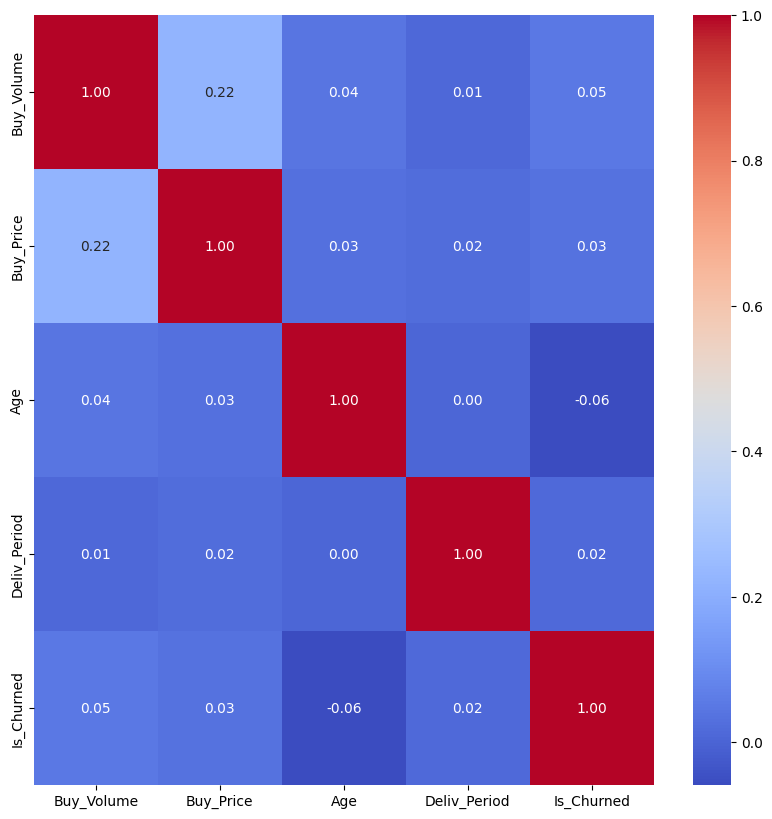

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(10,10))
sns.heatmap(data_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## 결과

> - 다중 공선성을 의심할만 한 상관관계가 없음


## 연속형 - 이산형 : 상관관계 분석

In [ ]:
data_corr_2 = data[['Buy_Volume','Buy_Price','Deliv_Period','Is_Churned','Use_Stat','Sex','Age','Marriage','Reg_Card','Sub_YN']]

- 상관관계 히트맵

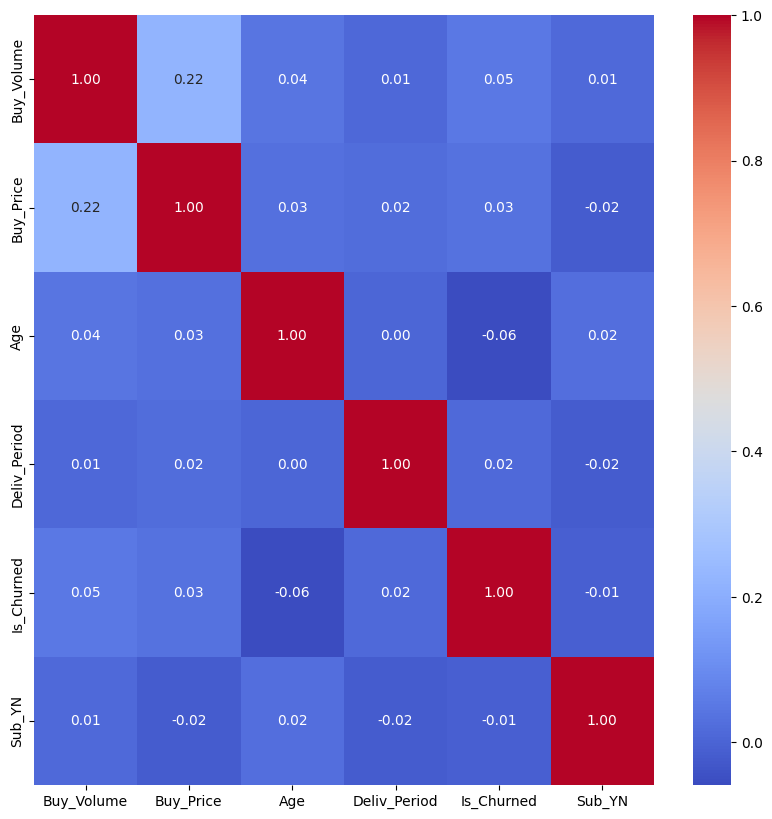

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr_2[['Buy_Volume','Buy_Price','Age','Deliv_Period','Is_Churned','Sub_YN']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## 결과
> - 가장 높은 상관계수가 0.6이지만 유의미한 값이 없음

# 사용할 모델 선정

## __분석 내용 요약__
> __*1. 이산형 변수와 종속변수 간의 카이제곱 검정*__
>    
> `Use_Stat`가 __이탈 여부(`Is_Churned`)__와 유의미한 관계를 보였다.
>
> __*2. 연속형 변수 간의 상관관계*__
>    
> `Buy_Volume`, `Buy_Price`, `Age`, `Deliv_Period`와 같은 변수들 간의 상관관계를 분석했으나 다중공선성이 없음을 확인했다.
>
> __*3. 연속형 변수와 종속변수 간의 상관관계*__
>    
> 상관계수는 유의미하지 않다고 판단되었다.

## __적합한 모델__

### 1. 랜덤 포레스트 회귀 (`Random Forest Regressor`)
> 설명: 여러 개의 결정 트리를 앙상블 방식으로 사용해 예측 성능을 높이는 비선형 회귀 모델이다.
>
> 라이브러리: `scikit-learn`의 `RandomForestRegressor`
>
> 사용 이유:
>
> 범주형 변수와 연속형 변수가 혼재된 데이터를 처리하는 데 강력한 성능을 발휘한다.
>
> 또한, 변수의 중요도를 파악할 수 있다.
>
> 특징:
>
> 여러 개의 결정 트리를 생성하여 예측을 수행하므로 과적합(`Overfitting`)을 방지한다.
>
> 다양한 변수를 포함하여 학습할 수 있으며, 모델 해석에 있어서도 유연성이 높다.

### 2 로지스틱 회귀 (`Logistic Regression`)
> 설명: 이진 또는 다중 클래스 분류 문제를 해결하는 선형 모델로, 종속 변수가 범주형일 때 사용한다.
>
> 라이브러리: `scikit-learn`의 `LogisticRegression`
>
> 사용 이유:
>
> IS_Churned와 같은 이진 종속 변수를 예측할 때, 기본적으로 많이 사용된다.
>
> 특징:
>
> `Use_Stat`,`Sex`,`Marriage`와 같은 범주형 변수를 더미 변수로 변환하여 사용할 수 있다.
>
> 모델이 간단하면서도 해석이 용이하다.

### 3 Gradient Boosting Regressor (예: `XGBoost`, `LightGBM`)
> 설명: 여러 개의 약한 예측기를 순차적으로 학습하여 성능을 향상시키는 모델이다.
>
> 라이브러리: `xgboost`의 `XGBRegressor` 또는 `lightgbm`의 `LGBMRegressor`
>
> 사용 이유:
>
> 데이터의 관계가 복잡할 때, 강력한 성능을 보여줍니다. 특히 카이제곱 검정에서 유의미한 변수들이 여러 개 발견되었으므로
>
> 이들을 활용해 비선형 패턴을 찾기에 적합하다.
>
> 특징:
>
> 과적합 방지를 위한 다양한 하이퍼파라미터 튜닝이 가능하며, 정확도를 높이는 데 유리하다.
>
> 모델이 깊어질수록 복잡한 패턴을 학습할 수 있어 복잡한 데이터에 적합하다.

## __결론__
### 로지스틱 회귀
> 가장 기본적이면서도 해석이 용이하므로, 우선적으로 적용해보고 성능을 평가할 수 있다.
### 랜덤 포레스트와 Gradient Boosting Classifier
> 보다 높은 예측 성능을 목표로 할 때, 특히 변수들 간의 비선형적 관계가 있을 것으로 예상된다면 이러한 앙상블 모델을 사용하는 것이 좋다.







